This example illustrates the principle of the muon fit
--------------------------------------------------------------

Part of the ingredients is a modification function, which in principle, can have an arbitrary number of parameters.
We start with a simple one, just a linear up-/down-scaling, using one parameter for each particle species.

The particles, which we try to rescale are $\pi^+$, $\pi^-$, K$^+$ and K$^-$. We will fit the muon spectrum
in all accesible zenith bins and the muon charge ratio.

Only protons shall be modified, since particle production by neutrons will be adjusted according
to isospin symmetries.

In [72]:
# Added by JP
import os, sys
os.chdir('/home/jp/projects/mceq/MCEq_jp')

In [73]:
#basic imports and jupyter setup
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
import scipy
#path to MCEq (it makes sense to put it in the same base directory as this project)
#sys.path.append('MCEq')
#os.chdir('..')
sys.path.append('/home/jp/projects/mceq/hp-IC-MCEq/references')
sys.path.append('/home/jp/projects/mceq/hp-IC-MCEq/calculations')

#import solver related modules
import MCEq
reload(MCEq)
from MCEq.core import MCEqRun
from mceq_config import config, mceq_config_without
#import primary model choices
import CRFluxModels as pm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
import iminuit

In [75]:
#import muon and neutrino data
import references as ref

In [76]:
#import re_publication_style
# I use nVidia GPUs for compute in 32-bit
config['FP_precision'] = 32
config['kernel_config'] = 'MKL' #'CUDA'
# If you have multiple of those, choose an ID
config['GPU_id'] = 0
# Speed-up of computation. The precision loss from these options is small ~2%
config["hybrid_crossover"] = 0.5

# JP defined this here cuz it didn't exist. Should check later if it works fine
#config['vetos'] = {}

#config["vetos"]["allowed_projectiles"] = [2212, 2112, 211, 321, 130]
# cache of atmospheric profiles saves 3-4 seconds for each zenith bins and it needs
# should be used. If used in parallel computations, it has to be complete, otherwise
# multiple nodes will try to write to the same time concurrently.
config["use_atm_cache"] = True
# Use isospin symmetries to derive neutron modifications from protons
config["use_isospin_sym"] = True

config["debug_level"] = 0

config['low_energy_extension']['enable'] = True
config['compact_mode'] = False

In [77]:
mceq_run = MCEqRun(
# Choose the best interaction mode (we can repeat the fit for SIBYLL 2.1 for consistency as well)
#interaction_model='DPMJETIII',
interaction_model='SIBYLL2.3',
#primary cosmic ray flux model
#support a tuple (primary model class (not instance!), arguments)
primary_model=(pm.Thunman, 'TIG'),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=20.,
#expand the rest of the options from mceq_config.py
**config
)

DecayYields::_load(): Warning: no decay distributions for 2112 found.
DecayYields::_load(): Warning: no decay distributions for -2112 found.


In [78]:
e_grid = mceq_run.y.e_grid
mag=3

In [79]:
cos_theta_range = [0,1]
theta_points = 15
cos_theta_angles = np.linspace(cos_theta_range[0],
                           cos_theta_range[1],
                           theta_points)
theta_angles = np.rad2deg(np.arccos(cos_theta_angles))
theta_angles = np.concatenate((theta_angles, -theta_angles[::-1][1:]))


numu    = np.zeros([theta_angles.size, e_grid.size])
numubar = np.zeros_like(numu)
for i, one_theta in enumerate(theta_angles):
    mceq_run.set_theta_deg(one_theta)
    mceq_run.solve()
    numu[i,:] = mceq_run.get_solution('total_numu', mag)
    numubar[i,:] = mceq_run.get_solution('total_antinumu', mag)


(0.1, 4)

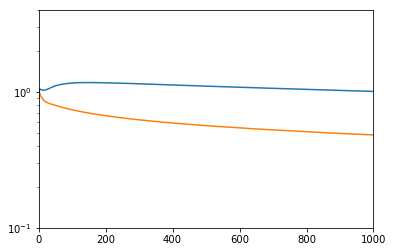

In [80]:
plt.plot(e_grid,numu.sum(axis=0))
plt.plot(e_grid,numubar.sum(axis=0))
plt.xlim(0, 10**3)
plt.yscale('log')
plt.ylim(0.1, 4)


/home/jp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


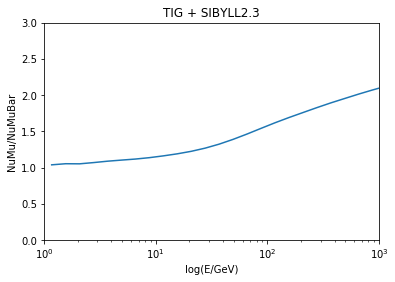

In [81]:
plt.plot(e_grid,numu.sum(axis=0)/numubar.sum(axis=0))
#plt.xlim(0, 3)
plt.xlim(1, 10**3)
plt.ylim(0,3)
plt.xscale('log')
plt.xlabel('log(E/GeV)')
plt.ylabel('NuMu/NuMuBar')
plt.title('TIG + SIBYLL2.3')

/home/jp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


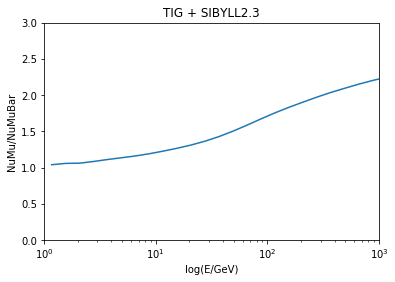

In [82]:
plt.plot(e_grid,numu[7,:]/numubar[7,:])
plt.xlim(1, 10**3)
plt.ylim(0,3)
plt.xscale('log')
plt.xlabel('log(E/GeV)')
plt.ylabel('NuMu/NuMuBar')
plt.title('TIG + SIBYLL2.3')